In [1771]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from fpdf import FPDF

sns.set_theme(style="whitegrid")

file_path = 'PDA_Dados_Cursos_Graduacao_Brasil.csv'
df = pd.read_csv(file_path, delimiter=',', skipinitialspace=True)

df['REGIAO'] = df['REGIAO'].str.strip().str.upper()
df = df.dropna(subset=['REGIAO'])
df = df[~df['REGIAO'].isin(['IGNORADO/EXTERIOR'])]


C:\Users\xrafa\AppData\Local\Temp\ipykernel_6584\548970112.py:9: DtypeWarning: Columns (12) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path, delimiter=',', skipinitialspace=True)


Importação e Definição da Base de Dados

Criando PDF

In [1772]:
pdf = FPDF()
pdf.add_page()

def add_text(pdf, text):
    pdf.set_font('Arial', '', 12)
    pdf.multi_cell(0, 10, text)
    pdf.ln(10)

pdf.set_font('Arial', 'B', 16)
pdf.cell(0, 10, 'Dados dos Cursos', 0, 1, 'C')

total_cursos = df['CODIGO_CURSO'].nunique()
print(f"Total de Cursos: {total_cursos}")

pdf.set_font('Arial', '', 12)
texto_apresentacao_inicial = f"""
Analisamos os dados sobre cursos de graduação no Brasil.
O relatório gerado apresenta uma análise detalhada dos cursos de graduação no Brasil com base em um conjunto de dados abrangente. O objetivo principal foi compreender a distribuição, a popularidade, onde estão concentradas e a situação atual dos cursos oferecidos pelas Instituições de Ensino Superior (IES) em diferentes regiões do país. A seguir, discutiremos as principais descobertas e tendências identificadas no estudo.

Resumo das principais análises realizadas:

1. Quantitativo Geral dos Cursos: Identificamos o total de cursos sendo um total de: {total_cursos} disponíveis, sendo essa uma das métricas básicas para compreensão do volume educacional
2. Quantitativo por Categoria da IES: Analisamos a distribuição dos cursos com base na categoria da instituição de ensino superior (pública, privada, etc).
3. Modalidade de Ensino por Região: Verificamos como as diferentes modalidades de ensino (presencial, à distância) estão distribuídas entre as regiões do Brasil.
4. Situação dos Cursos: Comparação entre cursos em atividade, em extinção e já extintos.
5. Cursos Mais Procurados: Avaliamos os cursos que possuem maior número de alunos matriculados, identificando tendências de popularidade.
6. Distribuição Regional de Cursos por Habitante: Comparamos o número de cursos oferecidos em relação à população de cada região, para verificar a proporção de cursos por habitante.

Essas análises fornecem uma visão abrangente sobre a estrutura educacional dos cursos de graduação no Brasil.
"""

add_text(pdf, texto_apresentacao_inicial)




Total de Cursos: 7497


C:\Users\xrafa\AppData\Local\Temp\ipykernel_6584\2483195903.py:9: DeprecationWarning: Substituting font arial by core font helvetica - This is deprecated since v2.7.8, and will soon be removed
  pdf.set_font('Arial', 'B', 16)
C:\Users\xrafa\AppData\Local\Temp\ipykernel_6584\2483195903.py:10: DeprecationWarning: The parameter "ln" is deprecated since v2.5.2. Instead of ln=1 use new_x=XPos.LMARGIN, new_y=YPos.NEXT.
  pdf.cell(0, 10, 'Dados dos Cursos', 0, 1, 'C')
C:\Users\xrafa\AppData\Local\Temp\ipykernel_6584\2483195903.py:15: DeprecationWarning: Substituting font arial by core font helvetica - This is deprecated since v2.7.8, and will soon be removed
  pdf.set_font('Arial', '', 12)
C:\Users\xrafa\AppData\Local\Temp\ipykernel_6584\2483195903.py:5: DeprecationWarning: Substituting font arial by core font helvetica - This is deprecated since v2.7.8, and will soon be removed
  pdf.set_font('Arial', '', 12)


Quantitativo Geral Dos Cursos

In [1773]:
total_cursos = df['CODIGO_CURSO'].nunique()
print(f"Total de Cursos: {total_cursos}")

Total de Cursos: 7497


Quantitativo Por Categoria Da IES

In [1774]:
categoria_ies = df['CATEGORIA_ADMINISTRATIVA'].value_counts()
print("\nDistribuição por Categoria da IES:")
print(categoria_ies)


Distribuição por Categoria da IES:
CATEGORIA_ADMINISTRATIVA
Privada com fins lucrativos    29816
Privada sem fins lucrativos     4539
Pública Federal                  593
Pública Estadual                 381
Pública Municipal                127
Especial                          31
Name: count, dtype: int64


Quantitativo por Organização Acadêmica

In [1775]:
organizacao_academica = df['ORGANIZACAO_ACADEMICA'].value_counts()
print("\nDistribuição por Organização Acadêmica:")
print(organizacao_academica)


Distribuição por Organização Acadêmica:
ORGANIZACAO_ACADEMICA
Centro Universitário                                   17422
Universidade                                           16133
Faculdade                                               1820
Instituto Federal de Educação, Ciência e Tecnologia      111
Centro Federal de Educação Tecnológica                     1
Name: count, dtype: int64


Quantitativo por modalidade de ensino

In [1776]:
modalidade = df['MODALIDADE'].value_counts()
print("\nDistribuição por Modalidade de Ensino:")
print(modalidade)


Distribuição por Modalidade de Ensino:
MODALIDADE
Educação a Distância    32640
Educação Presencial      2847
Name: count, dtype: int64


Distribuição de Categorias da IES e Organizaçôes Acadêmicas

In [1777]:
file_path = 'PDA_Dados_Cursos_Graduacao_Brasil.csv'
df = pd.read_csv(file_path, delimiter=',', skipinitialspace=True)

print(df['REGIAO'].unique())

df['REGIAO'] = df['REGIAO'].str.strip().str.upper()

df = df.dropna(subset=['REGIAO'])
df = df[~df['REGIAO'].isin(['IGNORADO', 'EXTERIOR'])]

categoria_ies = df['CATEGORIA_ADMINISTRATIVA'].value_counts()

organizacao_academica = df['ORGANIZACAO_ACADEMICA'].value_counts()

plt.figure(figsize=(16, 14))

plt.subplot(2, 2, 1)
sns.barplot(x=categoria_ies.index, y=categoria_ies.values, palette='viridis')
plt.title('Distribuição por Categoria da IES')
plt.xlabel('Categoria')
plt.ylabel('Quantidade')
plt.xticks(rotation=90)

plt.subplot(2, 2, 2)
sns.barplot(x=organizacao_academica.index, y=organizacao_academica.values, palette='viridis')
plt.title('Distribuição por Organização Acadêmica')
plt.xlabel('Organização Acadêmica')
plt.ylabel('Quantidade')
plt.xticks(rotation=90)

plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.4, wspace=0.3, hspace=0.4)

plt.savefig('grafico_combined_org_ies.png')
plt.close()

pdf.add_page()

pdf.set_font('Arial', 'B', 16)
pdf.cell(0, 10, 'Distribuição de Categorias da IES e Organizações Acadêmicas', 0, 1, 'C')


pdf.image('grafico_combined_org_ies.png', x=10, y=30, w=190)

pdf.ln(140)
pdf.set_font('Arial', '', 12)

texto_apresentacao_acad_ies = f"""
A primeira análise realizada refere-se ao número total de cursos cadastrados no sistema educacional. Identificamos um total de {total_cursos} cursos ativos e disponíveis no Brasil. Esse número nos oferece uma visão geral do volume da oferta educacional no país, refletindo a diversidade e abrangência de cursos ofertados.
Analisamos também a distribuição dos cursos por categoria administrativa das instituições (federais, estaduais, municipais, privadas). A análise revela que a maioria dos cursos é oferecida por instituições privadas, com uma contribuição significativa das instituições federais. Além disso, quando observamos a organização acadêmica, verificamos que as universidades e centros universitários são os principais tipos de organização a ofertar cursos, o que demonstra a predominância dessas instituições no ensino superior brasileiro.
"""

add_text(pdf, texto_apresentacao_acad_ies)


C:\Users\xrafa\AppData\Local\Temp\ipykernel_6584\3042948887.py:2: DtypeWarning: Columns (12) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path, delimiter=',', skipinitialspace=True)


['SUDESTE' 'NORDESTE' 'SUL' 'CENTRO-OESTE' 'NORTE' 'IGNORADO/EXTERIOR' nan]


C:\Users\xrafa\AppData\Local\Temp\ipykernel_6584\3042948887.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=categoria_ies.index, y=categoria_ies.values, palette='viridis')
C:\Users\xrafa\AppData\Local\Temp\ipykernel_6584\3042948887.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=organizacao_academica.index, y=organizacao_academica.values, palette='viridis')
C:\Users\xrafa\AppData\Local\Temp\ipykernel_6584\3042948887.py:38: DeprecationWarning: Substituting font arial by core font helvetica - This is deprecated since v2.7.8, and will soon be removed
  pdf.set_font('Arial', 'B', 16)
C:\Users\xrafa\AppData\Local\Temp\ipykernel_6584\3042948887.py:39: DeprecationWarning: The parame

Grafico Demonstrando o Quantitativo Geral Organizado Por Situações

In [1778]:
file_path = 'PDA_Dados_Cursos_Graduacao_Brasil.csv'
df = pd.read_csv(file_path, delimiter=',', skipinitialspace=True)

print(df['REGIAO'].unique())

df['REGIAO'] = df['REGIAO'].str.strip().str.upper()

df = df.dropna(subset=['REGIAO'])
df = df[~df['REGIAO'].isin(['IGNORADO', 'EXTERIOR'])]

categoria_ies = df['CATEGORIA_ADMINISTRATIVA'].value_counts()

organizacao_academica = df['ORGANIZACAO_ACADEMICA'].value_counts()

modalidade = df['MODALIDADE'].value_counts()

cursos_procurados = df['NOME_CURSO'].value_counts().head(10)
cursos_df = cursos_procurados.reset_index()
cursos_df.columns = ['Nome do Curso', 'Quantidade']

plt.figure(figsize=(16, 13))

plt.subplot(2, 2, 3)
sns.barplot(x=modalidade.index, y=modalidade.values, palette='viridis')
plt.title('Distribuição por Modalidade de Ensino')
plt.xlabel('Modalidade')
plt.ylabel('Quantidade')
plt.xticks(rotation=90)

plt.subplot(2, 2, 4)
sns.barplot(x='Nome do Curso', y='Quantidade', data=cursos_df, palette='viridis')
plt.title('Distribuições dos Cursos Mais Procurados')
plt.xlabel('Nome do Curso')
plt.ylabel('Quantidade')
plt.xticks(rotation=90)

plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.4, wspace=0.3, hspace=0.4)

plt.savefig('grafico_combined.png')
plt.close()

pdf.add_page()
pdf.set_font('Arial', 'B', 16)
pdf.cell(0, 10, 'Distribuição Geral dos Cursos', 0, 1, 'C')
pdf.image('grafico_combined.png', x=16, y=pdf.get_y(), w=180)

texto_apresentacao_qnt_geral_org_sit = """
Com a crescente importância da educação a distância (EAD), também analisamos a distribuição da modalidade de ensino por região. Essa análise destacou um crescimento expressivo dos cursos a distância, principalmente em áreas menos densamente povoadas, como o Norte e o Centro-Oeste do Brasil. A pandemia acelerou essa tendência, mas os dados mostram que o EAD já vinha se consolidando como uma modalidade de ensino significativa em várias regiões por conta do desenvolvimento da tecnologia. Outro aspecto relevante abordado foi a distribuição dos cursos entre as modalidades de ensino presencial e a distância. Esta análise mostrou que há uma oferta expressiva de cursos à distância (EAD), um formato que tem crescido nos últimos anos, especialmente no contexto da pandemia e das novas demandas educacionais. Identificamos também os 20 cursos mais procurados no país, com destaque para áreas como Administração, Direito e Pedagogia. Esses cursos refletem as demandas do mercado de trabalho e a popularidade dessas áreas de conhecimento.
"""

pdf.ln(120)
pdf.set_font('Arial', '', 6)
add_text(pdf, texto_apresentacao_qnt_geral_org_sit)

C:\Users\xrafa\AppData\Local\Temp\ipykernel_6584\1511829517.py:2: DtypeWarning: Columns (12) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path, delimiter=',', skipinitialspace=True)
C:\Users\xrafa\AppData\Local\Temp\ipykernel_6584\1511829517.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=modalidade.index, y=modalidade.values, palette='viridis')
C:\Users\xrafa\AppData\Local\Temp\ipykernel_6584\1511829517.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Nome do Curso', y='Quantidade', data=cursos_df, palette='viridis')


['SUDESTE' 'NORDESTE' 'SUL' 'CENTRO-OESTE' 'NORTE' 'IGNORADO/EXTERIOR' nan]


C:\Users\xrafa\AppData\Local\Temp\ipykernel_6584\1511829517.py:43: DeprecationWarning: Substituting font arial by core font helvetica - This is deprecated since v2.7.8, and will soon be removed
  pdf.set_font('Arial', 'B', 16)
C:\Users\xrafa\AppData\Local\Temp\ipykernel_6584\1511829517.py:44: DeprecationWarning: The parameter "ln" is deprecated since v2.5.2. Instead of ln=1 use new_x=XPos.LMARGIN, new_y=YPos.NEXT.
  pdf.cell(0, 10, 'Distribuição Geral dos Cursos', 0, 1, 'C')
C:\Users\xrafa\AppData\Local\Temp\ipykernel_6584\1511829517.py:52: DeprecationWarning: Substituting font arial by core font helvetica - This is deprecated since v2.7.8, and will soon be removed
  pdf.set_font('Arial', '', 6)
C:\Users\xrafa\AppData\Local\Temp\ipykernel_6584\2483195903.py:5: DeprecationWarning: Substituting font arial by core font helvetica - This is deprecated since v2.7.8, and will soon be removed
  pdf.set_font('Arial', '', 12)


Situação dos cursos e Correlação dos Cursos em extinção/extintos em Comparação aos cursos em atividade

In [1779]:
situacao_curso = df['SITUACAO_CURSO'].value_counts()
print("\nSituação dos Cursos:")
print(situacao_curso)

df = pd.DataFrame({
    'SITUACAO_CURSO': ['Em atividade'] * 33533 + ['Extinto'] * 1592 + ['Em extinção'] * 391
})

situacao_curso = df['SITUACAO_CURSO'].value_counts()

total_cursos = situacao_curso.sum()

cursos_atividade = situacao_curso.get('Em atividade', 0)
cursos_extinto = situacao_curso.get('Extinto', 0)
cursos_extincao = situacao_curso.get('Em extinção', 0)

percent_extinto = (cursos_extinto / cursos_atividade) * 100
percent_extincao = (cursos_extincao / cursos_atividade) * 100

print(f"Total de Cursos: {total_cursos}")

print(f"Percentual de Cursos Extintos em comparação com Cursos em Atividade: {percent_extinto:.2f}%")

print(f"Percentual de Cursos em Extinção em comparação com Cursos em Atividade: {percent_extincao:.2f}%")


Situação dos Cursos:
SITUACAO_CURSO
Em atividade    33533
Extinto          1592
Em extinção       391
Name: count, dtype: int64
Total de Cursos: 35516
Percentual de Cursos Extintos em comparação com Cursos em Atividade: 4.75%
Percentual de Cursos em Extinção em comparação com Cursos em Atividade: 1.17%


Quantitativo de Cursos por Região

In [1780]:
file_path = 'PDA_Dados_Cursos_Graduacao_Brasil.csv'
df = pd.read_csv(file_path, delimiter=',', skipinitialspace=True)

df['REGIAO'] = df['REGIAO'].str.strip().str.upper()
df = df.dropna(subset=['REGIAO'])
df = df[~df['REGIAO'].isin(['IGNORADO/EXTERIOR'])]


cursos_por_regiao = df['REGIAO'].value_counts()
print("\nCursos por Região:")
print(cursos_por_regiao)


Cursos por Região:
REGIAO
SUDESTE         13680
NORDESTE         7914
SUL              7472
NORTE            3212
CENTRO-OESTE     3209
Name: count, dtype: int64


C:\Users\xrafa\AppData\Local\Temp\ipykernel_6584\2913086325.py:2: DtypeWarning: Columns (12) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path, delimiter=',', skipinitialspace=True)


Quantitativo da Modalidade de Ensino por Região

In [1781]:
file_path = 'PDA_Dados_Cursos_Graduacao_Brasil.csv'
df = pd.read_csv(file_path, delimiter=',', skipinitialspace=True)

df['REGIAO'] = df['REGIAO'].str.strip().str.upper()
df = df.dropna(subset=['REGIAO'])
df = df[~df['REGIAO'].isin(['IGNORADO/EXTERIOR'])]


modalidade_por_regiao = pd.crosstab(df['REGIAO'], df['MODALIDADE'])
print("\nModalidade de Ensino por Região:")
print(modalidade_por_regiao)


Modalidade de Ensino por Região:
MODALIDADE    Educação Presencial  Educação a Distância
REGIAO                                                 
CENTRO-OESTE                  258                  2951
NORDESTE                      540                  7374
NORTE                         203                  3009
SUDESTE                      1310                 12370
SUL                           536                  6936


C:\Users\xrafa\AppData\Local\Temp\ipykernel_6584\3146597621.py:2: DtypeWarning: Columns (12) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path, delimiter=',', skipinitialspace=True)


Quantitativo de Alunos por Curso

In [1782]:
cursos_procurados = df['NOME_CURSO'].value_counts().head(20)

cursos_df = cursos_procurados.reset_index()
cursos_df.columns = ['Nome do Curso', 'Quantidade']

print(cursos_df)

                            Nome do Curso  Quantidade
0                           ADMINISTRAÇÃO         924
1                               PEDAGOGIA         875
2                         EDUCAÇÃO FÍSICA         760
3                      CIÊNCIAS CONTÁBEIS         724
4              GESTÃO DE RECURSOS HUMANOS         671
5                                HISTÓRIA         631
6                              MATEMÁTICA         621
7                               LOGÍSTICA         578
8   ANÁLISE E DESENVOLVIMENTO DE SISTEMAS         578
9                    PROCESSOS GERENCIAIS         555
10                    CIÊNCIAS BIOLÓGICAS         539
11                       GESTÃO COMERCIAL         537
12                      GESTÃO FINANCEIRA         516
13                              GEOGRAFIA         510
14                         SERVIÇO SOCIAL         501
15                         GESTÃO PÚBLICA         496
16                              MARKETING         484
17                       GES

Gráfico de Distribuição de Cursos por Região

In [1783]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='REGIAO', palette='viridis')
plt.title('Distribuição de Cursos por Região')
plt.xlabel('Região')
plt.ylabel('Quantidade de Cursos')
plt.savefig('grafico_cursos_regiao.png')
plt.close()

pdf.add_page()
pdf.set_font('Arial', 'B', 16)
pdf.cell(0, 10, 'Distribuição de Cursos por Região', 0, 1, 'C')
pdf.image('grafico_cursos_regiao.png', x=10, y=pdf.get_y(), w=180)


texto_apresentacao_dist_reg = """
O Gráfico de Distribuição de Cursos por Região oferece uma visão clara sobre como os cursos de graduação estão distribuídos pelas diferentes regiões do Brasil. Essa análise é fundamental para entender a concentração de oportunidades educacionais e identificar possíveis disparidades entre as regiões do país. De acordo com os dados, observa-se uma maior concentração de cursos nas regiões Sudeste e Nordeste, refletindo o desenvolvimento econômico e a busca por ensino nessas áreas. A região Sudeste, sendo a mais industrializada e urbanizada do país, destaca-se com uma quantidade expressiva de cursos. O Nordeste, apresenta uma grande oferta de cursos, o que demonstra esforços de expansão do ensino superior na região. Por outro lado, as regiões Norte e Centro-Oeste apresentam um número relativamente menor de cursos, o que pode refletir tanto o menor número de instituições quanto o menor foco de políticas públicas e demanda populacional em comparação com outras regiões. No entanto, essa distribuição sugere uma oportunidade para a expansão de instituições de ensino e o fortalecimento de políticas nessas áreas. Este gráfico, portanto, é uma ferramenta importante para compreender as assimetrias regionais na oferta de cursos de graduação e pode apoiar a tomada de decisões estratégicas para melhorar o acesso à educação superior em todo o país.
"""

pdf.ln(95)
pdf.set_font('Arial', '', 6)
add_text(pdf, texto_apresentacao_dist_reg)

C:\Users\xrafa\AppData\Local\Temp\ipykernel_6584\4221210912.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='REGIAO', palette='viridis')
C:\Users\xrafa\AppData\Local\Temp\ipykernel_6584\4221210912.py:10: DeprecationWarning: Substituting font arial by core font helvetica - This is deprecated since v2.7.8, and will soon be removed
  pdf.set_font('Arial', 'B', 16)
C:\Users\xrafa\AppData\Local\Temp\ipykernel_6584\4221210912.py:11: DeprecationWarning: The parameter "ln" is deprecated since v2.5.2. Instead of ln=1 use new_x=XPos.LMARGIN, new_y=YPos.NEXT.
  pdf.cell(0, 10, 'Distribuição de Cursos por Região', 0, 1, 'C')
C:\Users\xrafa\AppData\Local\Temp\ipykernel_6584\4221210912.py:20: DeprecationWarning: Substituting font arial by core font helvetica - This is deprecated since v2.7.8, and will soon be removed
  pdf.set_font('A

Grafico de Cursos por Habitante

C:\Users\xrafa\AppData\Local\Temp\ipykernel_6584\2061088279.py:2: DtypeWarning: Columns (12) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path, delimiter=',', skipinitialspace=True)
C:\Users\xrafa\AppData\Local\Temp\ipykernel_6584\2061088279.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_regiao, x='REGIAO', y='cursos_por_habitante', palette='coolwarm')



Dados Constando População Quantidade Total de Vagas x População:
         REGIAO  total_vagas  populacao  cursos_por_habitante
0  CENTRO-OESTE   25437515.0   84840113              0.299829
1      NORDESTE   45266295.0   54658515              0.828165
2         NORTE   23528143.0   17354884              1.355707
3       SUDESTE   91558139.0   29937706              3.058288
4           SUL   37782822.0   16289538              2.319453


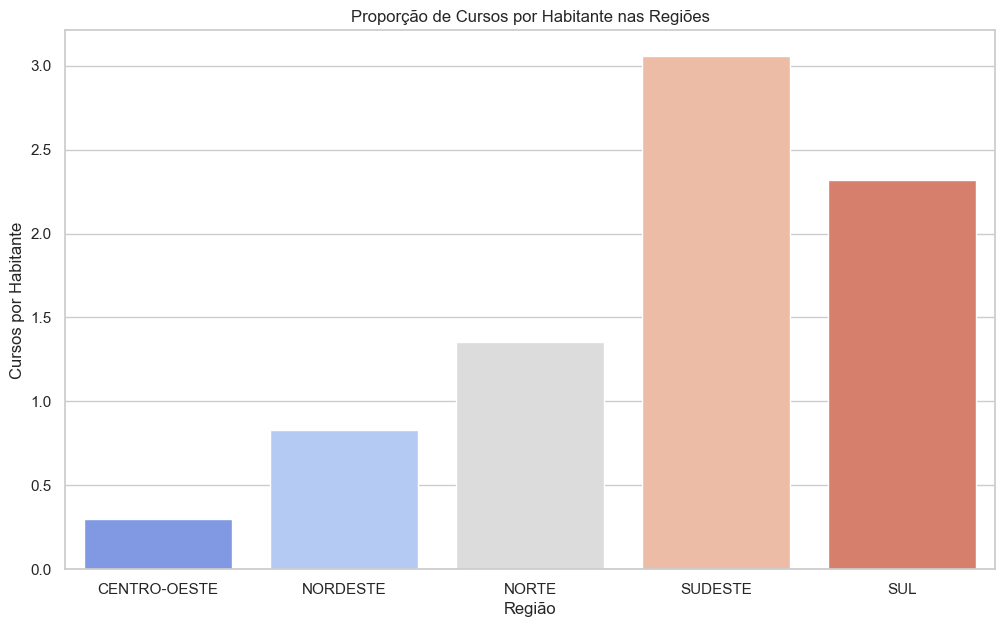

C:\Users\xrafa\AppData\Local\Temp\ipykernel_6584\2061088279.py:35: DeprecationWarning: Substituting font arial by core font helvetica - This is deprecated since v2.7.8, and will soon be removed
  pdf.set_font('Arial', 'B', 16)
C:\Users\xrafa\AppData\Local\Temp\ipykernel_6584\2061088279.py:36: DeprecationWarning: The parameter "ln" is deprecated since v2.5.2. Instead of ln=1 use new_x=XPos.LMARGIN, new_y=YPos.NEXT.
  pdf.cell(0, 10, 'Proporção de Cursos por Habitante nas Regiões', 0, 1, 'C')
C:\Users\xrafa\AppData\Local\Temp\ipykernel_6584\2061088279.py:44: DeprecationWarning: Substituting font arial by core font helvetica - This is deprecated since v2.7.8, and will soon be removed
  pdf.set_font('Arial', '', 6)
C:\Users\xrafa\AppData\Local\Temp\ipykernel_6584\2483195903.py:5: DeprecationWarning: Substituting font arial by core font helvetica - This is deprecated since v2.7.8, and will soon be removed
  pdf.set_font('Arial', '', 12)
C:\Users\xrafa\AppData\Local\Temp\ipykernel_6584\20610

In [1784]:
file_path = 'PDA_Dados_Cursos_Graduacao_Brasil.csv'
df = pd.read_csv(file_path, delimiter=',', skipinitialspace=True)

df['REGIAO'] = df['REGIAO'].str.strip().str.upper()
df = df.dropna(subset=['REGIAO'])
df = df[~df['REGIAO'].isin(['IGNORADO/EXTERIOR'])]

df_regiao = df.groupby('REGIAO').agg({'QT_VAGAS_AUTORIZADAS': 'sum'}).reset_index().rename(columns={'QT_VAGAS_AUTORIZADAS': 'total_vagas'})
df_populacao = pd.DataFrame({
    'REGIAO': ['NORTE', 'NORDESTE', 'CENTRO-OESTE', 'SUDESTE', 'SUL'],
    'populacao': [17354884, 54658515, 84840113, 29937706, 16289538]
})

df_regiao = df_regiao.merge(df_populacao, on='REGIAO', how='left')

df_regiao['cursos_por_habitante'] = df_regiao['total_vagas'] / df_regiao['populacao']

df['REGIAO'] = df['REGIAO'].str.strip().str.upper()
df = df.dropna(subset=['REGIAO'])
df = df[~df['REGIAO'].isin(['IGNORADO/EXTERIOR'])]


print("\nDados Constando População Quantidade Total de Vagas x População:")
print(df_regiao)

plt.figure(figsize=(12, 7))
sns.barplot(data=df_regiao, x='REGIAO', y='cursos_por_habitante', palette='coolwarm')
plt.title('Proporção de Cursos por Habitante nas Regiões')
plt.xlabel('Região')
plt.ylabel('Cursos por Habitante')
plt.savefig('grafico_cursos_por_habitante.png')
plt.show()

pdf.add_page()
pdf.set_font('Arial', 'B', 16)
pdf.cell(0, 10, 'Proporção de Cursos por Habitante nas Regiões', 0, 1, 'C')
pdf.image('grafico_cursos_por_habitante.png', x=10, y=pdf.get_y(), w=180)

texto_apresentacao_cur_hab = """
Também foi analisada a distribuição regional de cursos em relação à população de cada região, gerando uma métrica de cursos por habitante. As regiões Sudeste e Sul possuem o maior número de cursos por habitante, enquanto o Norte apresenta uma menor oferta relativa. Isso revela possíveis disparidades regionais na oferta educacional e pode indicar a necessidade de políticas públicas para melhorar o acesso à educação superior em regiões menos atendidas.
"""

pdf.ln(120)
pdf.set_font('Arial', '', 6)
add_text(pdf, texto_apresentacao_cur_hab)

Grafico de Situação dos Cursos por Região

C:\Users\xrafa\AppData\Local\Temp\ipykernel_6584\3779585792.py:2: DtypeWarning: Columns (12) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path, delimiter=',', skipinitialspace=True)



Distribuição da Situação dos Cursos por Região:
SITUACAO_CURSO  Em atividade  Em extinção  Extinto
REGIAO                                            
CENTRO-OESTE            3025           28      156
NORDESTE                7595           42      277
NORTE                   3078           32      102
SUDESTE                12746          217      717
SUL                     7060           72      340


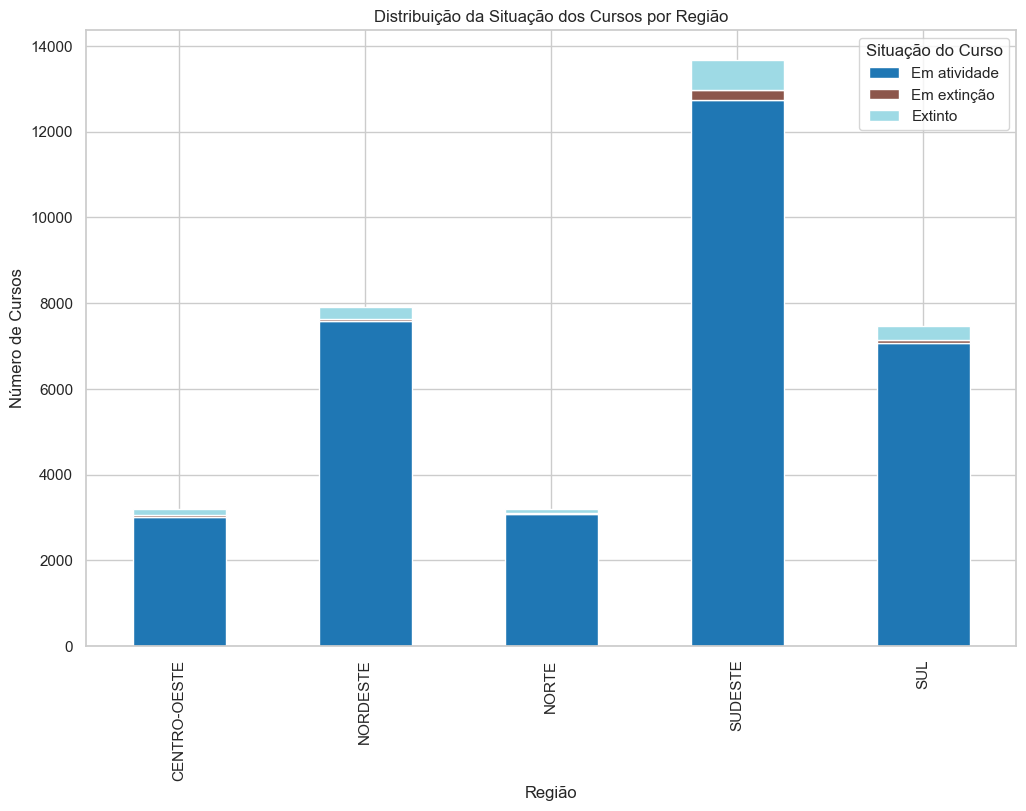

C:\Users\xrafa\AppData\Local\Temp\ipykernel_6584\3779585792.py:23: DeprecationWarning: Substituting font arial by core font helvetica - This is deprecated since v2.7.8, and will soon be removed
  pdf.set_font('Arial', 'B', 16)
C:\Users\xrafa\AppData\Local\Temp\ipykernel_6584\3779585792.py:24: DeprecationWarning: The parameter "ln" is deprecated since v2.5.2. Instead of ln=1 use new_x=XPos.LMARGIN, new_y=YPos.NEXT.
  pdf.cell(0, 10, 'Distribuição da Situação dos Cursos por Região', 0, 1, 'C')
C:\Users\xrafa\AppData\Local\Temp\ipykernel_6584\3779585792.py:32: DeprecationWarning: Substituting font arial by core font helvetica - This is deprecated since v2.7.8, and will soon be removed
  pdf.set_font('Arial', '', 6)
C:\Users\xrafa\AppData\Local\Temp\ipykernel_6584\2483195903.py:5: DeprecationWarning: Substituting font arial by core font helvetica - This is deprecated since v2.7.8, and will soon be removed
  pdf.set_font('Arial', '', 12)


In [1785]:
file_path = 'PDA_Dados_Cursos_Graduacao_Brasil.csv'
df = pd.read_csv(file_path, delimiter=',', skipinitialspace=True)

df['REGIAO'] = df['REGIAO'].str.strip().str.upper()
df = df.dropna(subset=['REGIAO'])
df = df[~df['REGIAO'].isin(['IGNORADO/EXTERIOR'])]


df_situacao_regiao = df.groupby(['REGIAO', 'SITUACAO_CURSO']).agg({'CODIGO_CURSO': 'count'}).unstack(fill_value=0)
df_situacao_regiao.columns = df_situacao_regiao.columns.droplevel()
print("\nDistribuição da Situação dos Cursos por Região:")
print(df_situacao_regiao)

df_situacao_regiao.plot(kind='bar', stacked=True, figsize=(12, 8), colormap='tab20')
plt.title('Distribuição da Situação dos Cursos por Região')
plt.xlabel('Região')
plt.ylabel('Número de Cursos')
plt.legend(title='Situação do Curso')
plt.savefig('grafico_situacao_cursos.png')
plt.show()

pdf.add_page()
pdf.set_font('Arial', 'B', 16)
pdf.cell(0, 10, 'Distribuição da Situação dos Cursos por Região', 0, 1, 'C')
pdf.image('grafico_situacao_cursos.png', x=10, y=pdf.get_y(), w=190, h=120)

texto_apresentacao_cur_hab = f"""
Por fim, A situação dos cursos também foi um fator chave na análise. Identificamos que, embora a maioria dos cursos estejam em atividade, uma parte significativa está extinta ou em processo de extinção. Calculamos que cerca de {percent_extinto:.2f}% dos cursos já foram extintos, enquanto {percent_extincao:.2f}% estão atualmente em extinção, comparado ao total de cursos ativos. Isso demonstra como a dinâmica de oferta e demanda por certos cursos tem mudado ao longo dos anos. Essa análise permite uma visão clara das regiões com maior número de cursos extintos, em extinção e em atividade. Novamente, o Sudeste aparece como a região com maior concentração de cursos ativos, enquanto o Norte e o Centro-Oeste têm mais cursos em extinção, o que pode estar relacionado com a menor oferta e demanda ou uma pior aplicação das políticas públicas nessas áreas.
"""

pdf.ln(140)
pdf.set_font('Arial', '', 6)
add_text(pdf, texto_apresentacao_cur_hab)

Gerando o PDF

In [1786]:
pdf.output('relatorio_cursos.pdf')

print("PDF gerado com sucesso!")

PDF gerado com sucesso!
